In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

import scipy.stats as stat
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.stats import linregress

import itertools

import helperfile as hf


In [2]:
# Block of Code to show FIT Image

# bins, intensities  = hf.CreateData('180NoBRun1.txt')
# bins, intensities =  np.array(bins), np.array(intensities)
# hf.Plots(bins, intensities, "B=0.384 kG, Polarize = 180 deg, Intensity Plot - Full set", 'Bins', 'Intensity [ADU] ', figsize0= 15, figsize1=4)

In [3]:
# STEP 1: Load Data 
xy = np.loadtxt('XYR3_90_Dic.txt', dtype=int, delimiter=',')
print(type(xy))
print(f"Number of trials to examine = {len(xy)/2}\nTotal Number of arrays = {len(xy)}")

<class 'numpy.ndarray'>
Number of trials to examine = 11.0
Total Number of arrays = 22


In [4]:
# # STEP 2: Check all graphs  

# hf.MakeManyPlots(xy)

Data ratio set


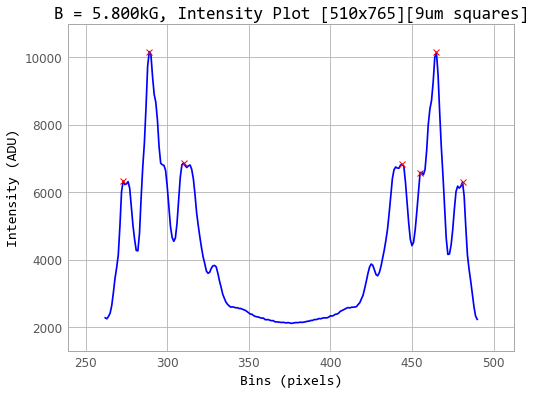

In [5]:
# STEP 5: TRUNCATE TO THE FIRST ORDER
peaks1, x_1, y_1 = hf.LabelPeaks_ShrinkData(xy[0],xy[1],262,490,4000)
peaks2, x_2, y_2 = hf.LabelPeaks_ShrinkData(xy[2],xy[3],262,490,4300)
peaks3, x_3, y_3 = hf.LabelPeaks_ShrinkData(xy[4],xy[5],262,490,4300)
peaks4, x_4, y_4 = hf.LabelPeaks_ShrinkData(xy[6],xy[7],262,490,4300)
peaks5, x_5, y_5 = hf.LabelPeaks_ShrinkData(xy[8],xy[9],262,490,4300)
peaks6, x_6, y_6 = hf.LabelPeaks_ShrinkData(xy[10],xy[11],262,490,4300)
peaks7, x_7, y_7 = hf.LabelPeaks_ShrinkData(xy[12],xy[13],262,490,4300)
peaks8, x_8, y_8 = hf.LabelPeaks_ShrinkData(xy[14],xy[15],262,490,4300)
peaks9, x_9, y_9 = hf.LabelPeaks_ShrinkData(xy[16],xy[17],262,490,4300)
peaks10, x_10, y_10 = hf.LabelPeaks_ShrinkData(xy[18],xy[19],262,490,4300)
peaks11, x_11, y_11 = hf.LabelPeaks_ShrinkData(xy[20],xy[21],262,490,4300)


# hf.Plots(x_1,y_1, 
#     'B = 5.900kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=8
#     )
# hf.PlotNewPeaks(peaks1,xy[1])


# hf.Plots(x_2,y_2, 
#     'B = 6.000kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks2,xy[3])

# hf.Plots(x_3,y_3, 
#     'B = 5.000kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks3,xy[5])


# hf.Plots(x_4,y_4, 
#     'B = 5.103kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks4,xy[7])


# hf.Plots(x_5,y_5, 
#     'B = 5.203kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks5,xy[9])

# hf.Plots(x_6,y_6, 
#     'B = 5.299kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks6,xy[11])

# hf.Plots(x_7,y_7, 
#     'B = 5.400kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks7,xy[13])

# hf.Plots(x_8,y_8, 
#     'B = 5.500kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks8,xy[15])

# hf.Plots(x_9,y_9, 
#     'B = 5.600kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks9,xy[17])

# hf.Plots(x_10,y_10, 
#     'B = 5.700kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks10,xy[19])

hf.Plots(x_11,y_11, 
    'B = 5.800kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks11,xy[21])



In [6]:
# STEP 6: CREATE RADIUS ARRAY 
B1 = 5.900E3 #Gauss
R1_1 = hf.RadiusMeter(peaks1[0], peaks1[-1])
R1_2 = hf.RadiusMeter(peaks1[1], peaks1[-2])
R1_3 = hf.RadiusMeter(peaks1[2], peaks1[-4])

B2 = 6.00E3
R2_1 = hf.RadiusMeter(peaks2[0], peaks2[-1])
R2_2 = hf.RadiusMeter(peaks2[1], peaks2[-2])
R2_3 = hf.RadiusMeter(peaks2[2], peaks2[-3])

B3 = 5.00E3
R3_1 = hf.RadiusMeter(peaks3[0], peaks3[-1])
R3_2 = hf.RadiusMeter(peaks3[1], peaks3[-2])
R3_3 = hf.RadiusMeter(peaks3[3], peaks3[-4])

B4 = 5.103E3
R4_1 = hf.RadiusMeter(peaks4[0], peaks4[-1])
R4_2 = hf.RadiusMeter(peaks4[1], peaks4[-2])
R4_3 = hf.RadiusMeter(peaks4[3], peaks4[-4])

B5 = 5.203E3
R5_1 = hf.RadiusMeter(peaks5[0], peaks5[-1])
R5_2 = hf.RadiusMeter(peaks5[1], peaks5[-2])
R5_3 = hf.RadiusMeter(peaks5[3], peaks5[-4])

B6 = 5.299E3
R6_1 = hf.RadiusMeter(peaks6[0], peaks6[-1])
R6_2 = hf.RadiusMeter(peaks6[1], peaks6[-2])
R6_3 = hf.RadiusMeter(peaks6[3], peaks6[-4])

B7 = 5.400E3
R7_1 = hf.RadiusMeter(peaks7[0], peaks7[-1])
R7_2 = hf.RadiusMeter(peaks7[1], peaks7[-2])
R7_3 = hf.RadiusMeter(peaks7[3], peaks7[-4])

B8 = 5.500E3
R8_1 = hf.RadiusMeter(peaks8[0], peaks8[-1])
R8_2 = hf.RadiusMeter(peaks8[1], peaks8[-2])
R8_3 = hf.RadiusMeter(peaks8[3], peaks8[-4])

B9 = 5.600E3
R9_1 = hf.RadiusMeter(peaks9[0], peaks9[-1])
R9_2 = hf.RadiusMeter(peaks9[1], peaks9[-2])
R9_3 = hf.RadiusMeter(peaks9[3], peaks9[-4])

B10 = 5.700E3
R10_1 = hf.RadiusMeter(peaks10[0], peaks10[-1])
R10_2 = hf.RadiusMeter(peaks10[1], peaks10[-2])
R10_3 = hf.RadiusMeter(peaks10[3], peaks10[-4])

B11 = 5.800E3
R11_1 = hf.RadiusMeter(peaks11[0], peaks11[-1])
R11_2 = hf.RadiusMeter(peaks11[1], peaks11[-2])
R11_3 = hf.RadiusMeter(peaks11[2], peaks11[-4])

radii = [
    R1_1, R1_2, R1_3,
    R2_1, R2_2, R2_3,
    R3_1, R3_2, R3_3,
    R4_1, R4_2, R4_3,
    R5_1, R5_2, R5_3,
    R6_1, R6_2, R6_3,
    R7_1, R7_2, R7_3,
    R8_1, R8_2, R8_3,
    R9_1, R9_2, R9_3,
    R10_1, R10_2, R10_3,
    R11_1, R11_2, R11_3,
]

# EACH Graph WILL CONTRIBUTE 2 DELTA E'S 

# CREATE B ARRAY EACH GRAPH WILL HAVE 2 B VALUES 
B = [
    B1,B1,
    B2,B2,
    B3,B3,
    B4,B4,
    B5,B5,
    B6,B6,
    B7,B7,
    B8,B8,
    B9,B9,
    B10,B10,
    B11,B11,
]

B = np.array(B)

In [7]:
# STEP 7: CREATE THETA ARRAYS 
thetas = hf.ThetasRadArray(radii)

#saved as txt to use in Error prop File to return Yerr 
np.savetxt("Run3Thetas90.txt", thetas, delimiter =", ")

In [8]:
# STEP 8: CREATE DELTA E ARRAYS 
delE_90 = hf.DeltaEPrime90(thetas)

In [9]:
# STEP 9: INITIAL PLOT 

# plt.scatter(B,delE_90)

In [10]:
# STEP 10: CREATE FIT FUNCTION 
# E = A*MU_0*B - TWO UNKNOWNS
# E = 0.5*MU_0B - A KNOWN 
# E = A*MU*B - MU_0 KNOWN 

# TWO UNKNOWNS 
def DelE1(B,mu_0,a):
    mu = 9.2741E-21 # erg/G
    A = 0.5
    return a*mu_0*B

p01 = [9.3E-21, 0.49]

# A KNOWN
def DelE2(B,mu_0):
    mu = 9.2741E-21 # erg/G
    A = 0.5
    return A*mu_0*B

p02 = [9.3E-21]

# MU KNOWN
def DelE3(B,a):
    mu = 9.2741E-21 # erg/G
    A = 0.5
    return a*mu*B

p03 = [0.49]

In [11]:
# STEP 11: LOAD ERROR FROM Error90.ipynb 
# AND ASSIGN B ERROR 

sigmaE = np.loadtxt('Run3Eerr90.txt', delimiter=',')




# CREATE SAME SIZE ARRAY
Barr = np.ones(len(B))
# ERROR
sigmaB = 0.05E3 # Gauss 
Berr = sigmaB*Barr

In [12]:
# STEP 12: APPLY FIT

# TWO UNKNOWNS 
popt1, pcov1 = curve_fit( 
                    DelE1,
                    B,
                    delE_90,
                    p0= p01, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt1)):
    print('param ',i,' = ',popt1[i], '+/-', np.sqrt(pcov1[i,i]))

# A KNOWN
print('\nA = 0.5 Known, fit mu_0 : 9.2741E-21')
popt2, pcov2 = curve_fit( 
                    DelE2,
                    B,
                    delE_90,
                    p0= p02, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt2)):
    print('param ',i,' = ',popt2[i], '+/-', np.sqrt(pcov2[i,i]))

# MU KNOWN
print('\nmu_0 = 9.2741E-21, fit A : Assuming A = 1/2')
popt3, pcov3 = curve_fit( 
                    DelE3,
                    B,
                    delE_90,
                    p0= p03, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt3)):
    print('param ',i,' = ',popt3[i], '+/-', np.sqrt(pcov3[i,i]))

param  0  =  8.093626074504313e-21 +/- 7.851864375618985e-15
param  1  =  0.5404310209241637 +/- 524288.0

A = 0.5 Known, fit mu_0 : 9.2741E-21
param  0  =  8.748098974537993e-21 +/- 1.076670935759037e-22

mu_0 = 9.2741E-21, fit A : Assuming A = 1/2
param  0  =  0.4716413977579226 +/- 0.005804719245218999


[8.09362607e-21 5.40431021e-01]


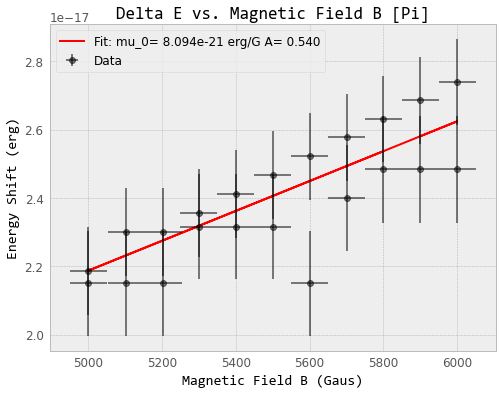

In [13]:
# PLOT1

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit1 = DelE1(B, *popt1)

#data
plt.plot(B, fit1, label = 'Fit: mu_0= %1.3e erg/G A= %1.3f' % tuple(popt1), color = 'red')

plt.errorbar(
    B, 
    delE_90, 
    yerr= sigmaE,
    xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("Delta E vs. Magnetic Field B [Pi]", **hfont)
plt.xlabel('Magnetic Field B (Gaus)', **hfont)
plt.ylabel('Energy Shift (erg)', **hfont)
plt.legend(loc=2)

print(popt1)

# hf.SaveFigure("PiDelEvsB90Run3_1.png")

[8.74809897e-21]


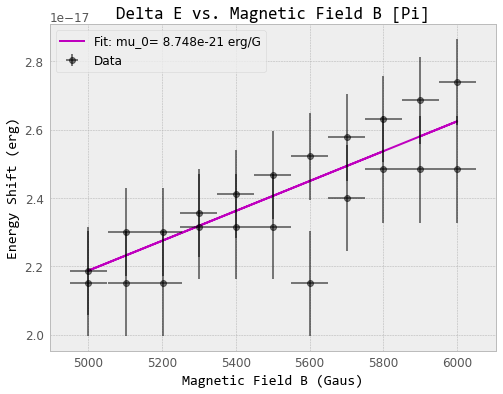

In [14]:
# PLOT2

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit2 = DelE2(B, *popt2)

#data
plt.plot(B, fit2, label = 'Fit: mu_0= %1.3e erg/G' % tuple(popt2), color = 'm')

plt.errorbar(
    B, 
    delE_90, 
    yerr= sigmaE,
    xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("Delta E vs. Magnetic Field B [Pi]", **hfont)
plt.xlabel('Magnetic Field B (Gaus)', **hfont)
plt.ylabel('Energy Shift (erg)', **hfont)
plt.legend(loc=2)

print(popt2)

# hf.SaveFigure("PiDelEvsB90Run3_2.png")

[0.4716414]


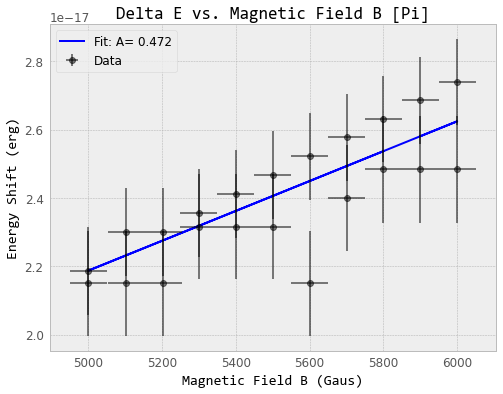

In [15]:
# PLOT3

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit3 = DelE3(B, *popt3)

#data
plt.plot(B, fit3, label = 'Fit: A= %1.3f' % tuple(popt3), color = 'b')

plt.errorbar(
    B, 
    delE_90, 
    yerr= sigmaE,
    xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("Delta E vs. Magnetic Field B [Pi]", **hfont)
plt.xlabel('Magnetic Field B (Gaus)', **hfont)
plt.ylabel('Energy Shift (erg)', **hfont)
plt.legend(loc=2)

print(popt3)

# hf.SaveFigure("PiDelEvsB90Run3_3.png")

In [16]:
# this is with the constraint of A = 1/2
print('Fit: mu_0 and A')
hf.Chi2Values(DelE1,B,delE_90,popt1,sigmaE)

print('\n\n')
print('Fit: mu_0, A = 0.5')
hf.Chi2Values(DelE2,B,delE_90,popt2,sigmaE)

print('\n\n')
print('Fit: A, mu_0 = 9.2741E-21')
hf.Chi2Values(DelE3,B,delE_90,popt3,sigmaE)

Fit: mu_0 and A
Chi-square:  10.501763631209354
Degrees of freedom:  20
Reduced chi-square:  0.5250881815604677
CDF:  0.04186489634994878
p-test value:  0.9581351036500512



Fit: mu_0, A = 0.5
Chi-square:  10.50176362833851
Degrees of freedom:  21
Reduced chi-square:  0.5000839823018338
CDF:  0.028366712288874302
p-test value:  0.9716332877111257



Fit: A, mu_0 = 9.2741E-21
Chi-square:  10.501763628338514
Degrees of freedom:  21
Reduced chi-square:  0.500083982301834
CDF:  0.02836671228887421
p-test value:  0.9716332877111258


In [17]:
# Try  a larger set of values---- This does not work becuse the values are so spead out 